# Smart Image Sorter 🖼️📁

<a href="https://www.bellingcat.com"><img alt="Bellingcat logo: Discover Bellingcat" src="https://img.shields.io/badge/Discover%20Bellingcat-%20?style=for-the-badge&logo=data%3Aimage%2Fpng%3Bbase64%2CiVBORw0KGgoAAAANSUhEUgAAAA4AAAAYCAYAAADKx8xXAAABhGlDQ1BJQ0MgcHJvZmlsZQAAKJF9kT1Iw0AcxV9TS0UqDnZQEcxQneyiIo6likWwUNoKrTqYXPoFTRqSFBdHwbXg4Mdi1cHFWVcHV0EQ%2FABxdnBSdJES%2F5cUWsR4cNyPd%2Fced%2B8AoVllqtkTA1TNMtKJuJjLr4rBVwQwhhBEDEvM1JOZxSw8x9c9fHy9i%2FIs73N%2Fjn6lYDLAJxLHmG5YxBvEs5uWznmfOMzKkkJ8Tjxp0AWJH7kuu%2FzGueSwwDPDRjY9TxwmFktdLHcxKxsq8QxxRFE1yhdyLiuctzir1Tpr35O%2FMFTQVjJcpzmKBJaQRIo6klFHBVVYiNKqkWIiTftxD%2F%2BI40%2BRSyZXBYwcC6hBheT4wf%2Fgd7dmcXrKTQrFgcCLbX%2BMA8FdoNWw7e9j226dAP5n4Err%2BGtNYO6T9EZHixwBA9vAxXVHk%2FeAyx1g6EmXDMmR%2FDSFYhF4P6NvygODt0Dfmttbex%2BnD0CWulq%2BAQ4OgYkSZa97vLu3u7d%2Fz7T7%2BwHEU3LHAa%2FQ6gAAAAZiS0dEAAAAAAAA%2BUO7fwAAAAlwSFlzAAAuIwAALiMBeKU%2FdgAAAAd0SU1FB%2BgFHwwiMH4odB4AAAAZdEVYdENvbW1lbnQAQ3JlYXRlZCB3aXRoIEdJTVBXgQ4XAAAA50lEQVQ4y82SvWpCQRCFz25ERSJiCNqlUiS1b5AuEEiZIq1NOsGXCKms0wXSp9T6dskDiFikyiPc%2FrMZyf3FXSGQ0%2BzuzPl2ZoeVKgQ0gQ2wBVpVHlcDkjM5V%2FJ5nag6sJ%2FZX%2Bh%2FC7gEhqeAFKf7p1M9aB3b5oN1OomB7g1axUBPBr3GQHODHmOgqUF3MZAzKI2d4LWBV4H%2BMXDuJd1a7Cew1k7SwksaHC4LqNaw7aeX9GWHXkC1G1sTAS17Y3Kk2lnp4wNLiz0DrgLq8qt2MfmSSabAO%2FBBXp26dtrADPjOmN%2BAUdG7B3cE61l5hOZiAAAAAElFTkSuQmCC&logoColor=%23fff&color=%23000"></a><!--
--><a href="https://discord.gg/bellingcat"><img alt="Discord logo: Join our community" src="https://img.shields.io/badge/Join%20our%20community-%20?style=for-the-badge&logo=discord&logoColor=%23fff&color=%235865F2"></a><!--
--><a href="https://www.bellingcat.com/resources/how-tos/2024/08/15/easy-ai-zero-shot-ai-image-classification-smart-image-sorter/"><img alt="Book icon: read the article" src="https://img.shields.io/badge/Explore%20the%20guide-%20?style=for-the-badge&logo=ReadMe&logoColor=fff&color=C41E3D"></a>

The Smart Image Sorter organises images into folders based on the classification results of an open-source AI model. The tool creates a subdirectory for each label and organises the images according to the label with the highest confidence score.

This tool was developed by Adriano Belisario as part of the Bellingcat Tech Fellowship.

<details>
<summary>Click here to learn more about the settings you can configure. 💡</summary>

**Mount Google Drive**

If you are running this notebook using Google Colab, we recommend you click on this button.

By default, Google Colab files are temporary, meaning they disappear when your session ends, either after a certain amount of time without any activity, or if you leave this page. Clicking on this button allows you to use your own images from Google Drive and save the sorted images easily.

You may ignore this button if you are running this notebook locally.

**Source**

The path to the folder with the images to be classified. In Google Colab, you can use the file manager in the left menu (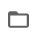) to get the path of your image folder. Right-click the folder, select "Copy path" and paste the directory below. The directories will be created if they do not exist.

**Destination**

The folder to which the images should be copied or moved after the classification. The code also generates an `output.csv` file in the destination folder, containing a table with all the filenames, labels and confidence score. If you are running this notebook using Google Colab, we recommend that you mount your Google Drive and use a destination file path from there to ensure your output is saved beyond your Google Colab session.

**Model**

The name of the zero-shot image classification model on HuggingFace that will be used.

The default option is the most downloaded zero-shot image classification model on HuggingFace. [Check out other models available](https://huggingface.co/models?pipeline_tag=zero-shot-image-classification&sort=downloads).

If you want to geolocate images, try **StreetCLIP** ([`geolocal/StreetCLIP`](https://huggingface.co/geolocal/StreetCLIP)) and use countries, regions, or cities as candidate labels.

**Labels**

A comma-separated list of categories that the model will use for classification. Short, descriptive labels in English tend to work the best in most cases: e.g. "a picture of a person" rather than "people". The model will always assign one (and only one) of the labels to the image, even if none of them are appropriate, so your labels should be as comprehensive as possible and should not overlap.

**Operation**

Define if the tool should copy or move the images from the source to the destination folder when sorting them. “Copy” ensures that you retain the original unsorted images, while “move” may be more efficient if you are concerned about storage space.

</details>

In [3]:
#@title Set up the parameters below

# @markdown ### ⬅️ Click to load the tool

from IPython.display import clear_output
import time
import os, sys, time
import ipywidgets as widgets
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

def is_running_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

def clone_repository(repository_url, directory):
    import subprocess
    result = subprocess.run(["git", "clone", repository_url, directory], capture_output=True, text=True)
    if result.returncode != 0:
        print(f"\x1b[31m There was an error while loading the tool: {result.stderr}\x1b[0m")


def create_mount_google_drive_button():
    # Create mount Google Drive button
    mount_button = widgets.Button(
                description='Mount Google Drive',
                disabled=False,
                button_style='success',
                tooltip='Click to mount Google Drive',
                icon='upload'
            )

    def on_mount_drive(b):
        from google.colab import drive
        GDRIVE_PATH = "/content/drive/"
        drive.mount(GDRIVE_PATH)
        print(f"Google Drive mounted at {GDRIVE_PATH}")

    mount_button.on_click(on_mount_drive)
    return mount_button


def setup_notebook(gh_name, repo_name):
    if is_running_in_colab():
        # Check for GPU
        if (os.environ.get("COLAB_GPU")==''):
            print("\x1b[33m It looks like there isn't a GPU available, which could make the tool run very slowly. Try selecting a runtime with a GPU (Runtime > Change runtime type). \x1b[0m")

        # Clone Repo
        repo_url = f"https://github.com/{gh_name}/{repo_name}.git"

        if not os.path.exists(repo_name):
            clone_repository(repo_url, repo_name)

        repo_path = os.path.abspath(repo_name)

        if repo_path not in sys.path:
            sys.path.append(repo_path)

setup_notebook("bellingcat", "smart-image-sorter")

# GUI

from utils.file_manager import setup_directories, list_images
from utils.model import list_models, classify_images

mount_button = create_mount_google_drive_button()

all_models = list_models()

labels_input = widgets.Text(
    value="screenshot of a newspaper article, a picture of a person, a picture of a politician, memes and computer-generated images",
    placeholder='Enter comma-separated labels',
    description='Labels:',
    layout=widgets.Layout(width='50%'),
    disabled=False
)

source_input = widgets.Text(
    value="/content/smart-image-sorter/imgs",
    placeholder='Enter source directory path',
    description='Source:',
    layout=widgets.Layout(width='50%'),
    disabled=False
)

destination_input = widgets.Text(
    value="labelled/",
    placeholder='Enter destination directory path',
    description='Destination:',
    layout=widgets.Layout(width='50%'),
    disabled=False
)

model_input = widgets.Combobox(
    value=all_models[0],
    placeholder="Select or type model name",
    options=all_models,
    description='Model:',
    ensure_option=True,
    disabled=False
)

operation_input = widgets.Dropdown(
    options=['copy', 'move'],
    value='copy',
    description='Operation:',
    disabled=False,
)

start_classification_button = widgets.Button(
    description='Start Classification',
    disabled=False,
    button_style='success',
    tooltip='Click to start image classification',
    icon='play'
)

def on_start_classification(b):
    clear_output()
    display(source_input,destination_input,model_input,labels_input, operation_input,start_classification_button)
    start_time = time.time()
    source = source_input.value
    destination = destination_input.value
    setup_directories(source, destination)
    labels = labels_input.value.split(',')
    labels = [label.strip() for label in labels]
    num_labels = len(labels)
    if num_labels < 2:
      print(f"\x1b[31m Please select two or more labels.\x1b[0m")
    else:
      print(f"Labels: {labels}")
      print(f"Source directory: {source}")
      print(f"Destination directory: {destination}")
      print(f"Starting classification...")
      images = list_images(source)
      classify_images(images, destination, model_input.value, labels, operation_input.value)
      print(f"Classification finished")
      end_time = time.time()
      elapsed_time = round(end_time - start_time)
      print(f"Elapsed time: {elapsed_time} seconds")

start_classification_button.on_click(on_start_classification)

if is_running_in_colab():
    display(mount_button)

display(source_input,destination_input,model_input,labels_input, operation_input,start_classification_button)


Text(value='/content/smart-image-sorter/imgs', description='Source:', layout=Layout(width='50%'), placeholder=…

Text(value='labelled/', description='Destination:', layout=Layout(width='50%'), placeholder='Enter destination…

Combobox(value='openai/clip-vit-large-patch14', description='Model:', ensure_option=True, options=('openai/cli…

Text(value='screenshot of a newspaper article, a picture of a person, a picture of a politician, memes and com…

Dropdown(description='Operation:', options=('copy', 'move'), value='copy')

Button(button_style='success', description='Start Classification', icon='play', style=ButtonStyle(), tooltip='…

Number of images in source directory: 32
Destination directory created: labelled
Labels: ['screenshot of a newspaper article', 'a picture of a person', 'a picture of a politician', 'memes and computer-generated images']
Source directory: /content/smart-image-sorter/imgs
Destination directory: labelled/
Starting classification...


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Model loaded  in CUDA: openai/clip-vit-large-patch14


Classifying 32 images in batches of 32...: 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

Classification finished. Results saved to labelled/output.csv
Classification finished
Elapsed time: 26 seconds
